## Exploratory Data Analysis

This sole purpose of this notebook is to carry out exploratory data analysis (E.D.A)

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import ipywidgets as widgets
from IPython.display import display, clear_output

In [2]:
# importing train and test data
df = pd.read_csv("../data/train.csv", sep=";")

In [3]:
lithology_keys = {30000: 'Sandstone',
                 65030: 'Sandstone/Shale',
                 65000: 'Shale',
                 80000: 'Marl',
                 74000: 'Dolomite',
                 70000: 'Limestone',
                 70032: 'Chalk',
                 88000: 'Halite',
                 86000: 'Anhydrite',
                 99000: 'Tuff',
                 90000: 'Coal',
                 93000: 'Basement'}

In [4]:
# dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170511 entries, 0 to 1170510
Data columns (total 29 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   WELL                               1170511 non-null  object 
 1   DEPTH_MD                           1170511 non-null  float64
 2   X_LOC                              1159736 non-null  float64
 3   Y_LOC                              1159736 non-null  float64
 4   Z_LOC                              1159736 non-null  float64
 5   GROUP                              1169233 non-null  object 
 6   FORMATION                          1033517 non-null  object 
 7   CALI                               1082634 non-null  float64
 8   RSHA                               630650 non-null   float64
 9   RMED                               1131518 non-null  float64
 10  RDEP                               1159496 non-null  float64
 11  RHOB                    

<Axes: >

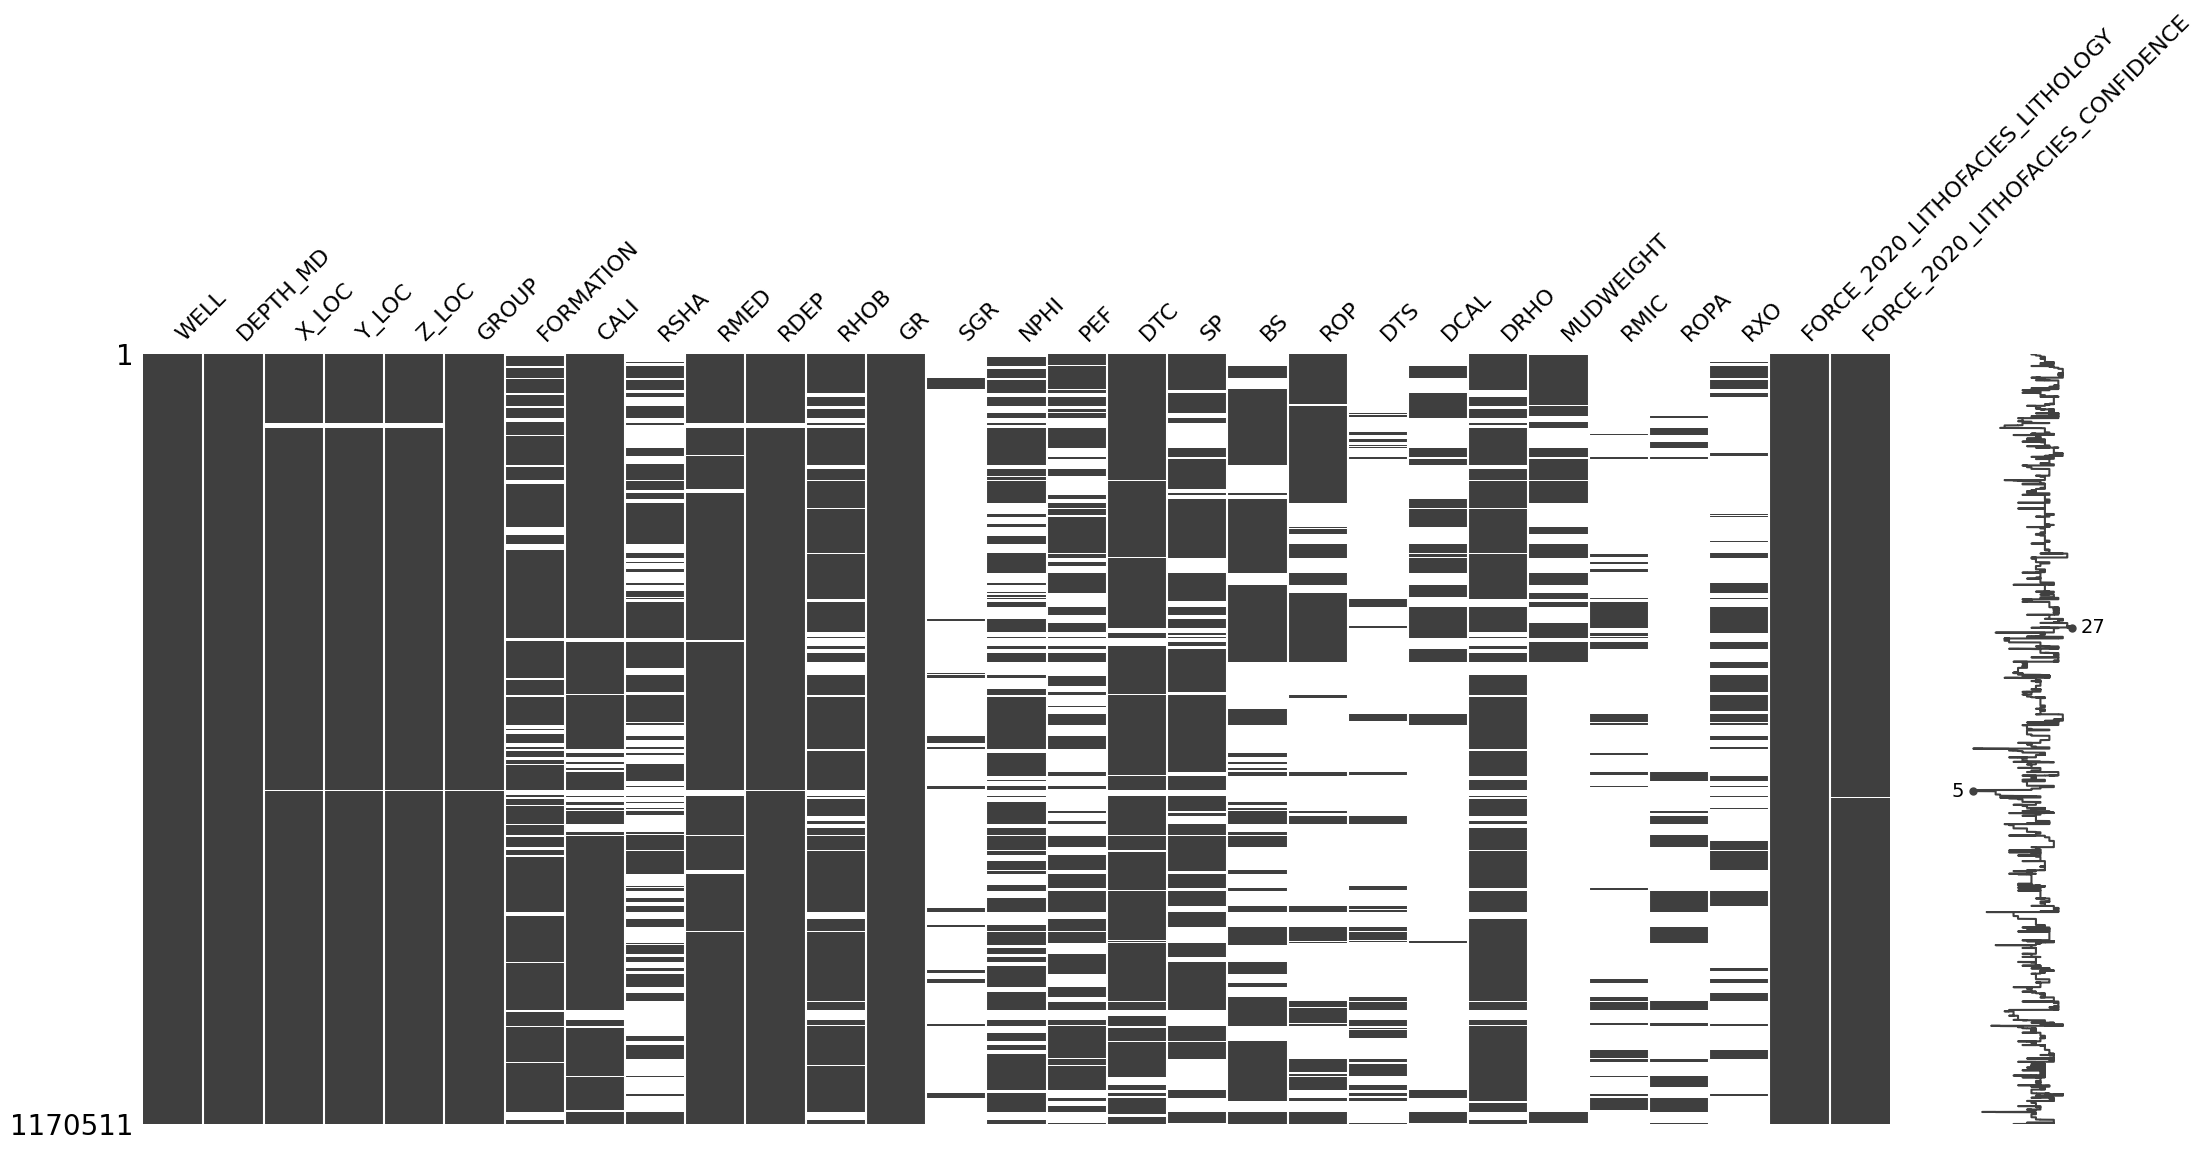

In [5]:
# missing instances per feature in dataframe
missingno.matrix(df)

In [6]:
# function for calculating % of missing values per feature in the dataset
def return_missing_values(df):
    for col in df.columns:
        missing = df[col].isna().sum()
        print(f"% missing in {col}: {missing/len(df):.1%}")
        
return_missing_values(df)

% missing in WELL: 0.0%
% missing in DEPTH_MD: 0.0%
% missing in X_LOC: 0.9%
% missing in Y_LOC: 0.9%
% missing in Z_LOC: 0.9%
% missing in GROUP: 0.1%
% missing in FORMATION: 11.7%
% missing in CALI: 7.5%
% missing in RSHA: 46.1%
% missing in RMED: 3.3%
% missing in RDEP: 0.9%
% missing in RHOB: 13.8%
% missing in GR: 0.0%
% missing in SGR: 94.1%
% missing in NPHI: 34.6%
% missing in PEF: 42.6%
% missing in DTC: 6.9%
% missing in SP: 26.2%
% missing in BS: 41.7%
% missing in ROP: 54.3%
% missing in DTS: 85.1%
% missing in DCAL: 74.5%
% missing in DRHO: 15.6%
% missing in MUDWEIGHT: 73.0%
% missing in RMIC: 85.0%
% missing in ROPA: 83.6%
% missing in RXO: 72.0%
% missing in FORCE_2020_LITHOFACIES_LITHOLOGY: 0.0%
% missing in FORCE_2020_LITHOFACIES_CONFIDENCE: 0.0%


In [7]:
df['FORCE_2020_LITHOFACIES_LITHOLOGY'] = df['FORCE_2020_LITHOFACIES_LITHOLOGY'].map(lithology_keys)

print("Unique Lithofacies in the dataset:\n-----------------------------")
for facie in df['FORCE_2020_LITHOFACIES_LITHOLOGY'].unique():
    print(facie)

Unique Lithofacies in the dataset:
-----------------------------
Shale
Sandstone
Sandstone/Shale
Limestone
Tuff
Marl
Anhydrite
Dolomite
Chalk
Coal
Halite
Basement


### Count of Lithofacies

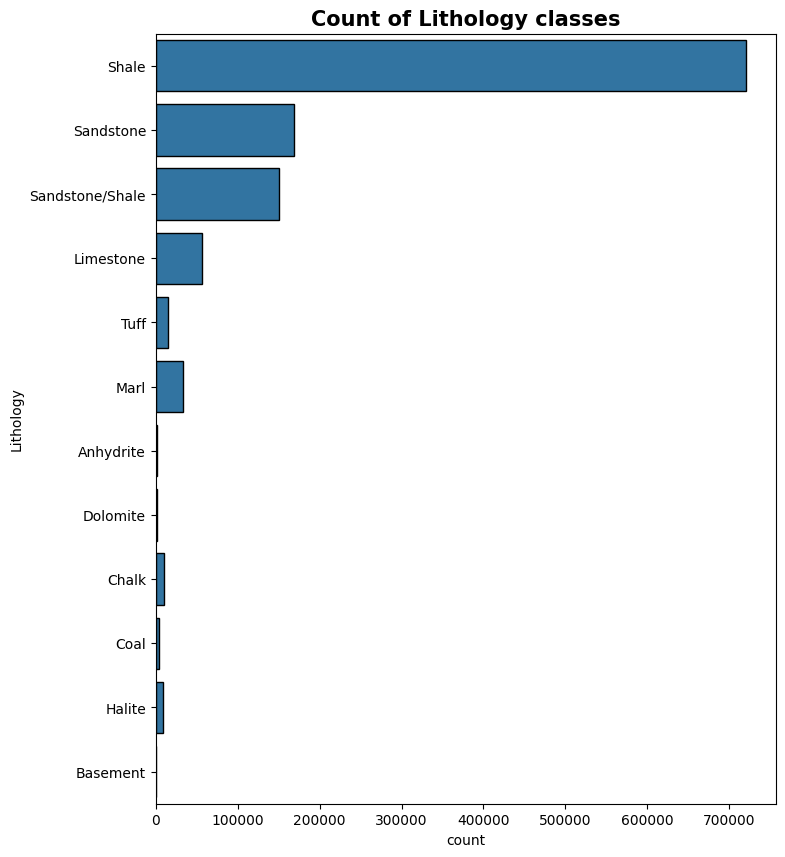

In [8]:
plt.figure(figsize=(8,10))
sns.countplot(df['FORCE_2020_LITHOFACIES_LITHOLOGY'], ec='k')
plt.title("Count of Lithology classes", fontsize=15, weight='bold')
plt.ylabel("Lithology")
plt.show()

### Histplot of numerical attributes

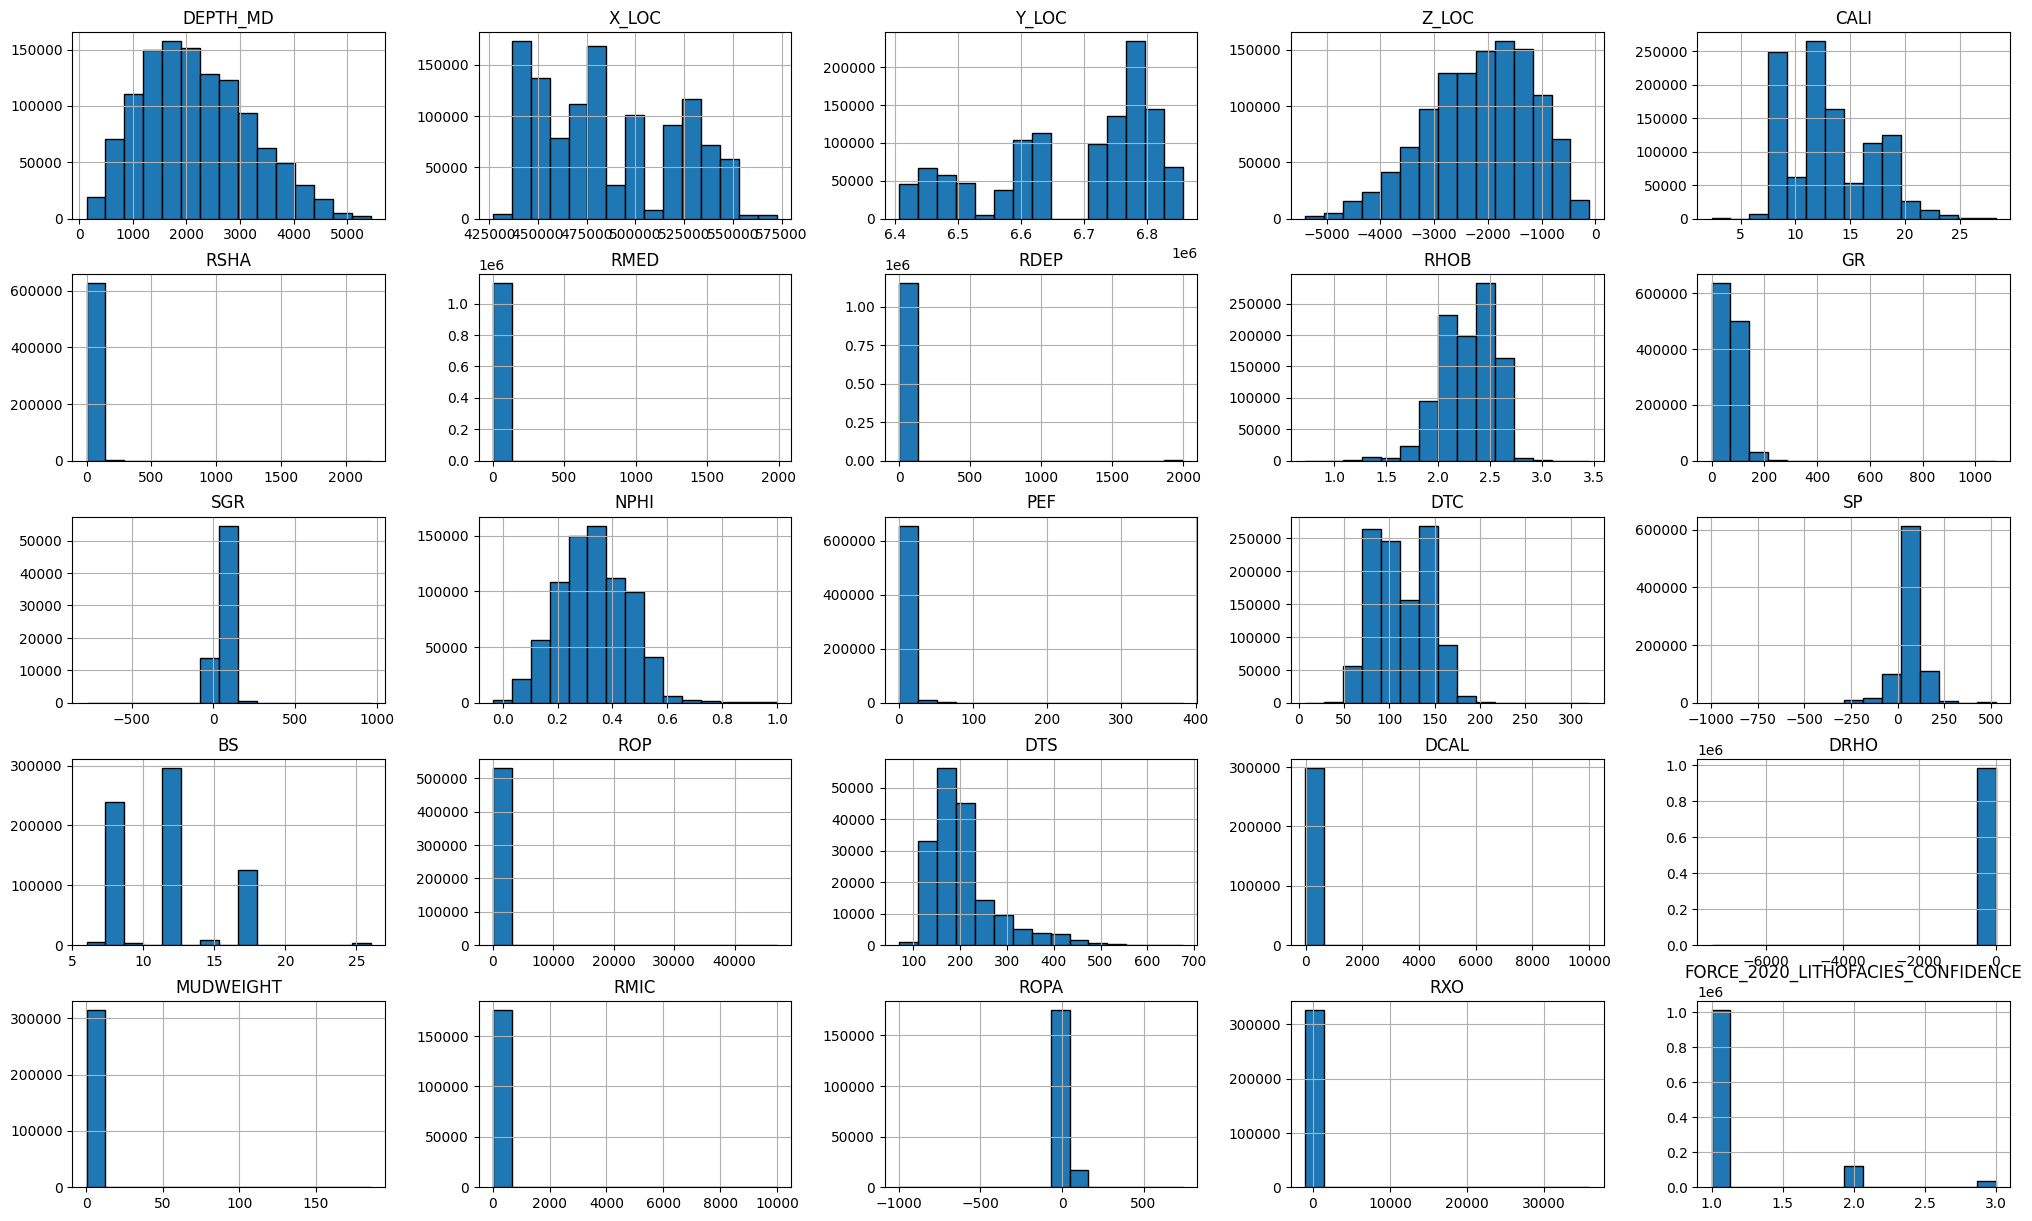

In [9]:
df.select_dtypes(include=np.number).hist(figsize=(25,15), bins=15, ec='k')
plt.show()

### Linear and non-linear Correlation

In [10]:
# linear relationship
def plot_correlation(method, data=df):
    df_copy = df.copy()
    df_copy.drop("FORCE_2020_LITHOFACIES_CONFIDENCE", axis=1, inplace=True)
    corr_matrix = df_copy.corr(numeric_only=True, method=method)
    plt.figure(figsize=(17,11))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".1f", cmap="seismic")
    plt.title(f"{method.title()} Log data correlation", weight="bold", fontsize=20, fontfamily="monospace")
    plt.xlabel("Log data", fontsize=15)
    plt.ylabel("Log data", fontsize=15)
    plt.show()

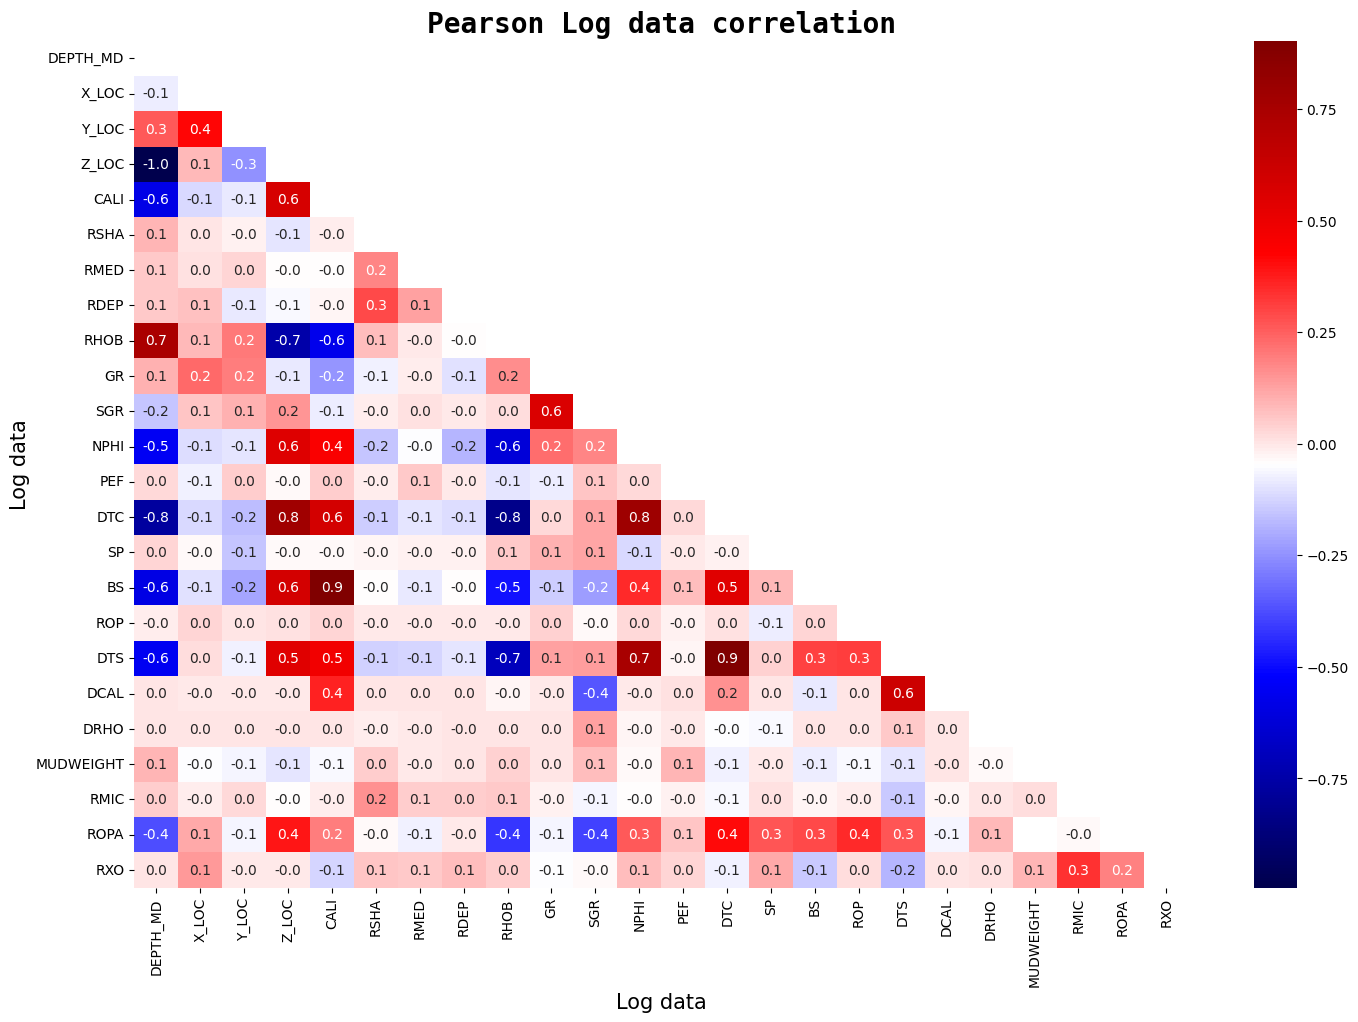

In [11]:
# Linear relationships
plot_correlation(method="pearson")

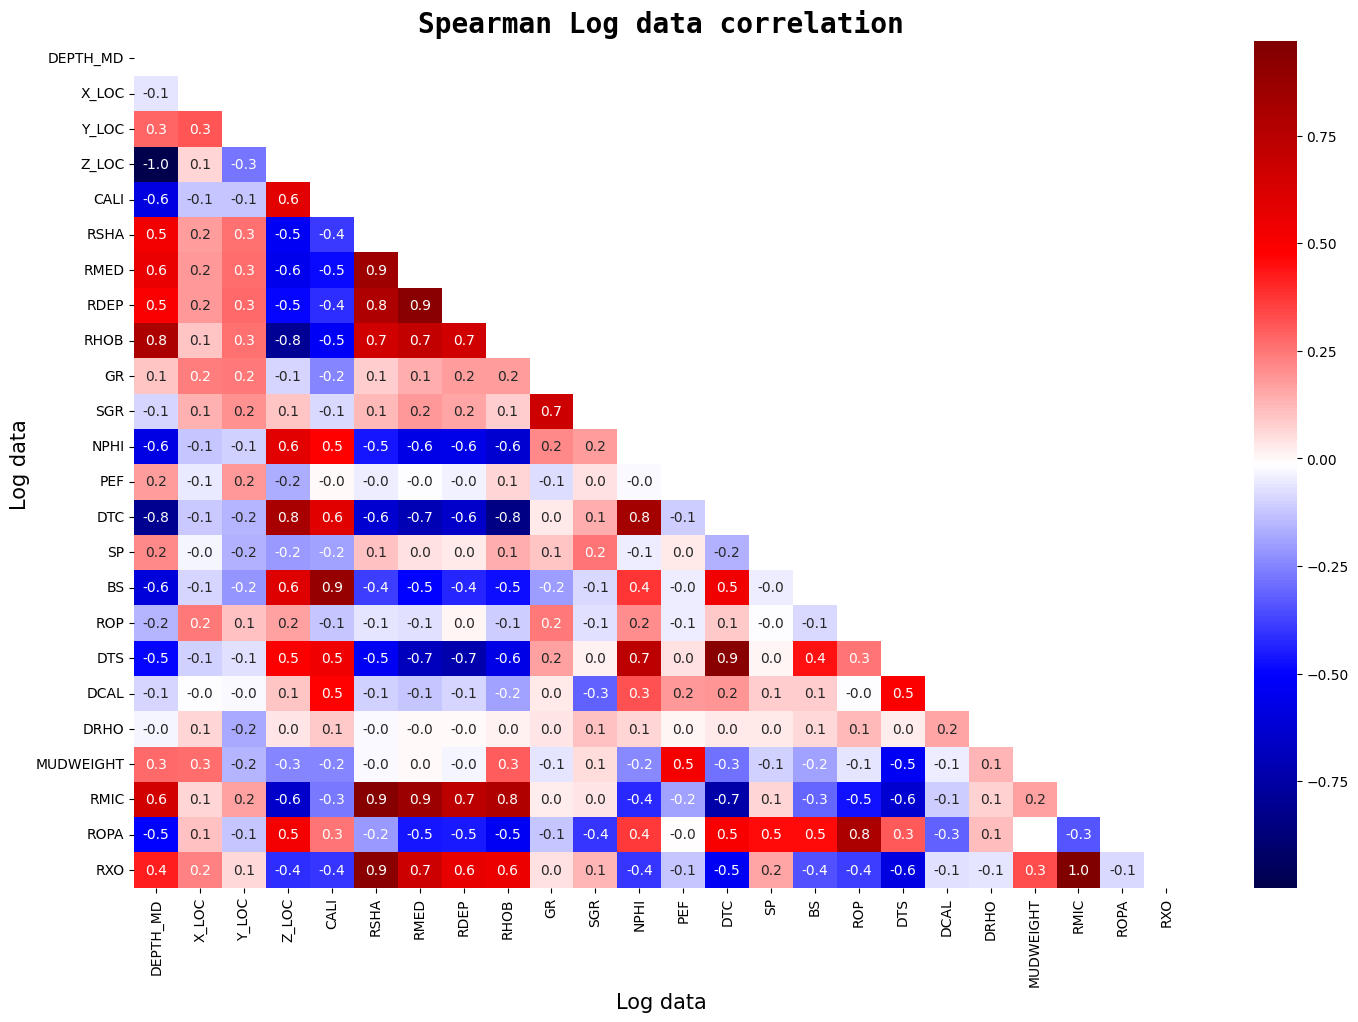

In [12]:
# non-linear relationships
plot_correlation(method="spearman")

### Well Log Data plot

Dropdown(description='Well', options=('15/9-13', '15/9-15', '15/9-17', '16/1-2', '16/1-6 A', '16/10-1', '16/10…

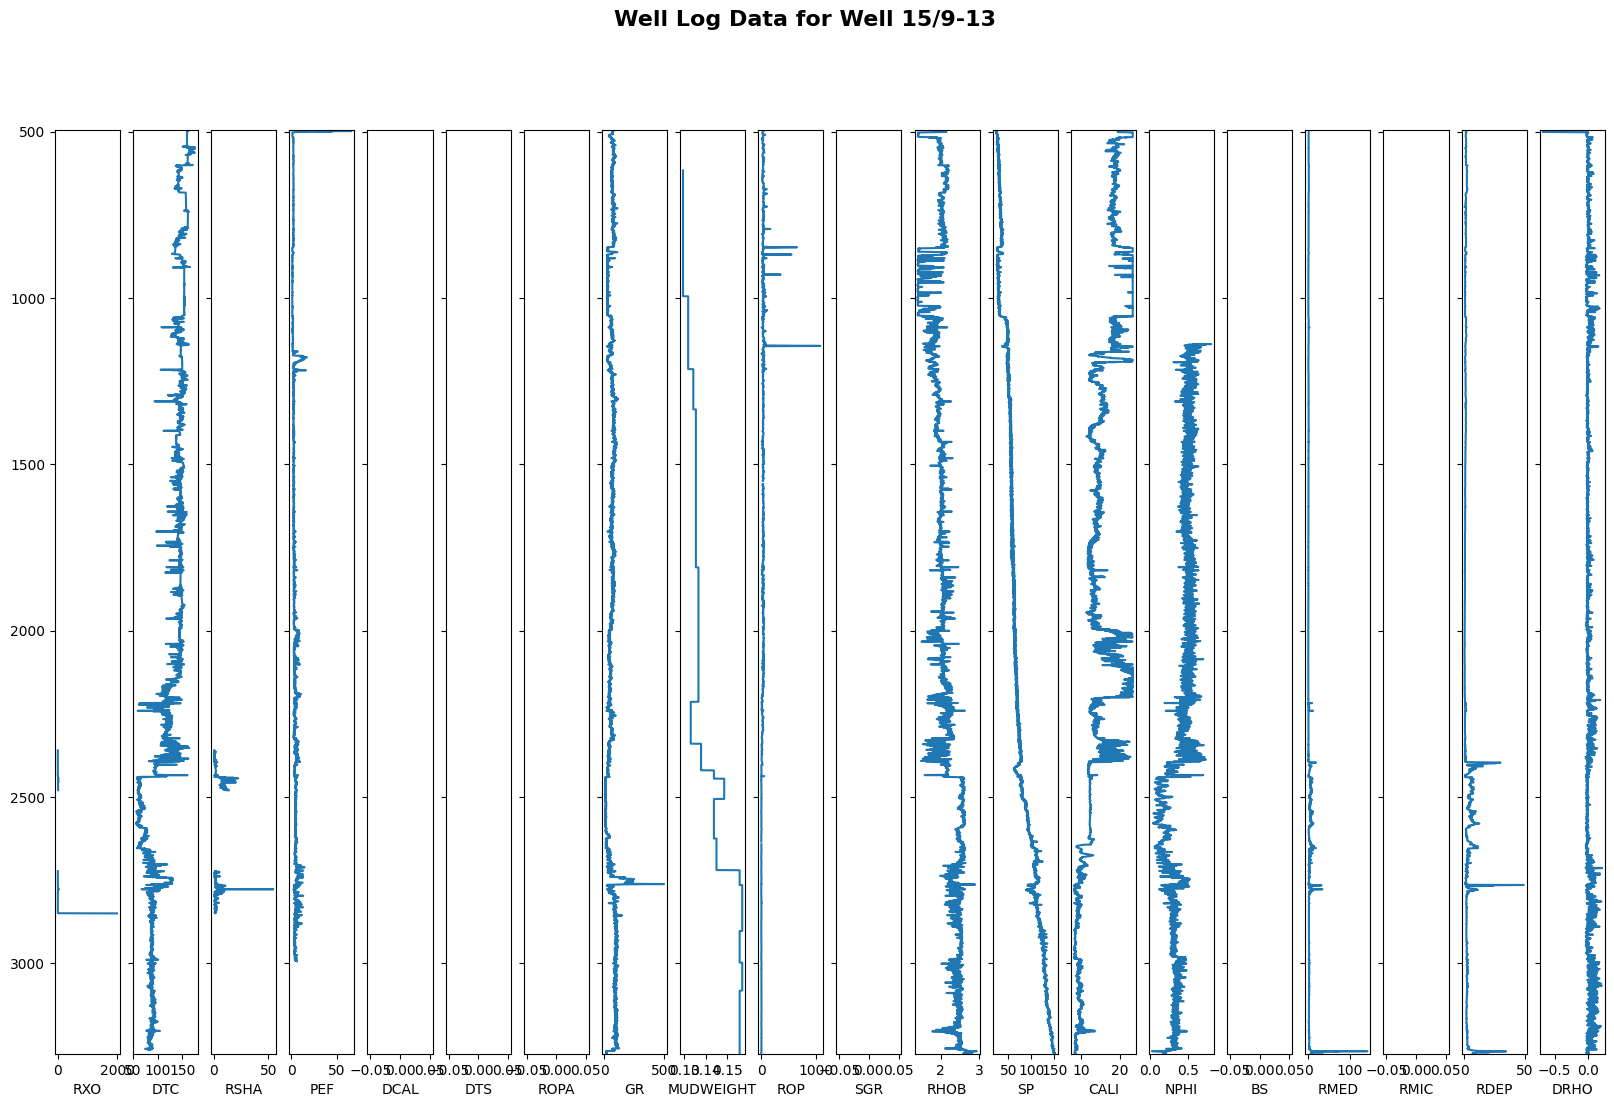

In [13]:
# creating the dropdown widget
well_selection = widgets.Dropdown(
    options=df['WELL'].unique(),
    value=df['WELL'].unique()[0],
    description="Well",
    disabled=False
)

# function to plot well log based on selected well
def plot_well_log(change=None):
    # clear the current output
    clear_output(wait=True)
    
    # display the dropdown widget
    display(well_selection)
    
    # filter the DataFrame based on the selected well
    well_data = df[df['WELL'] == well_selection.value]
    
    # define the columns to plot
    plot_columns = set(well_data.columns) - set(['DEPTH_MD', 'WELL', 'FORCE_2020_LITHOFACIES_LITHOLOGY', 
                                                 'FORCE_2020_LITHOFACIES_CONFIDENCE', 'GROUP', 
                                                 'FORMATION', 'X_LOC', 'Y_LOC', 'Z_LOC'])
    
    if not plot_columns:
        print("No columns to plot.")
        return
    
    # create subplots with the number of plot columns
    fig, axs = plt.subplots(1, len(plot_columns), figsize=(20, 12), sharey=True)
    
    # set a title for the figure
    fig.suptitle(f'Well Log Data for Well {well_selection.value}', fontsize=16, weight='bold')
    
    # plot each column
    for ic, col in enumerate(plot_columns):
        axs[ic].plot(well_data[col], well_data['DEPTH_MD'])
        axs[ic].set_xlabel(col)
    
    # adjust the y-axis limits for all subplots
    axs[0].set_ylim(well_data['DEPTH_MD'].values[-1], well_data['DEPTH_MD'].values[0])
    
    plt.show()

# llink the widget to the plotting function
well_selection.observe(plot_well_log, names='value')

# initial display of the plot
plot_well_log()
